In [1]:
import pandas as pd
data=pd.read_csv('insurance.csv')

In [2]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [8]:
#Convert columns from String['sex','smoker','region'] to Numerical Values

In [9]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [12]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [13]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [15]:
#Store Feature matrix in X and Response(Target) in Vector Y

In [16]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [32]:
X=data.drop(['expenses'],axis=1)


In [34]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [36]:
y=data['expenses']

In [38]:
#Split Data into Training and Testing Set

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
#20% data is kept for testing the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
#Import the Models

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
#Model Training

In [50]:
lr=LinearRegression()
lr.fit(X_train,y_train)

svm=SVR()
svm.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)



RandomForestRegressor()

In [51]:
#Prediction on Test Data

In [52]:
y_pred1=lr.predict(X_test) 
y_pred2=svm.predict(X_test) 
y_pred3=rf.predict(X_test) 

df1= pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3})

In [53]:
df1

,Actual,Lr,svm,rf
764,9095.07,8931.642854,9548.273266,11648.9542
887,5272.18,7108.658375,9492.505366,5199.1606
890,29330.98,36911.245886,9648.766753,28285.5058
1293,9301.89,9492.186731,9555.013641,10416.5872
259,33750.29,27005.514588,9420.413342,34411.7345
...,...,...,...,...
109,47055.53,39118.983220,9648.900738,47321.6498
575,12222.90,11822.870656,9625.450474,11917.9951
535,6067.13,7628.837051,9504.157290,6509.4151
543,63770.43,40956.397727,9605.016723,46425.4351


In [58]:
#Compare performance Visually

In [60]:
import matplotlib.pyplot as plt

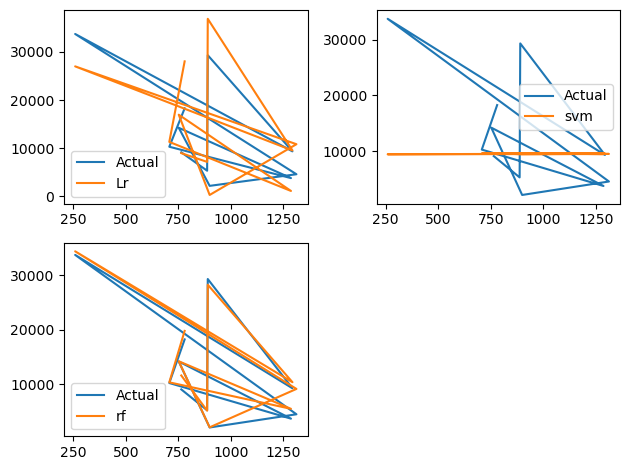

In [62]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.tight_layout()

In [64]:
#Evaluating the models

In [66]:
 from sklearn import metrics

In [68]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)


In [70]:
print(score1,score2,score3)

0.7833214205203848 -0.07229746602305465 0.8623177772016157


In [72]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)

In [74]:
print(s1,s2,s3)

4186.9401063170135 8592.429900208082 2504.3223657462686


In [76]:
#Predict Charges For New Customers

In [78]:
data={'age':40,
      'sex':1,
      'bmi':40.30,
      'children':4,
      'smoker':1,
      'region':2}

df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [80]:
new_pred=rf.predict(df)
print(new_pred)

[42877.2103]


In [82]:
#Save model using Joblib

In [84]:
rf=RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

In [85]:
import joblib

In [86]:
joblib.dump(rf,'model_joblib_rf')

['model_joblib_rf']

In [88]:
model=joblib.load('model_joblib_rf')

In [92]:
model.predict(df)

array([42887.1539])

In [94]:
#GUI

In [96]:
from tkinter import *
import joblib

In [98]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())

    model=joblib.load('model_joblib_rf')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])

    Label(master,text="Medical Insurance Cost ").grid(row=7)
    Label(master,text=result).grid(row=8)

master=Tk()
master.title("Medical Insurance Cost Prediction")
label=Label(master,text="Medical Insurance Cost Prediction",bg="Black",fg="White").grid(row=0,columnspan=2)

Label(master,text="Enter Your Age").grid(row=1)
Label(master,text="Male or Female [1/0]").grid(row=2)
Label(master,text="Enter Your BMI Value").grid(row=3)
Label(master,text="Enter Number of Children").grid(row=4)
Label(master,text="Smoker Yes/No [1/0]").grid(row=5)
Label(master,text="Region [1-4]").grid(row=6)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text="Predict",command=show_entry).grid()

master.mainloop()